<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/BackpropAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns 
import imageio 
from IPython.display import  HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["Red","Yellow","Green"])
np.random.seed(0)

#Generating Data and Plotting

In [19]:
data , labels = make_blobs(n_samples=1000, n_features =2, centers=4,random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


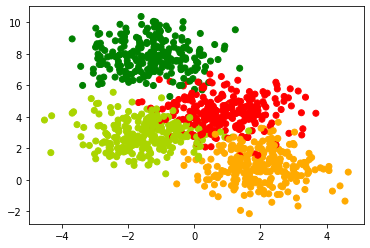

In [20]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
labels_original = labels 
labels = np.mod(labels_original,2)

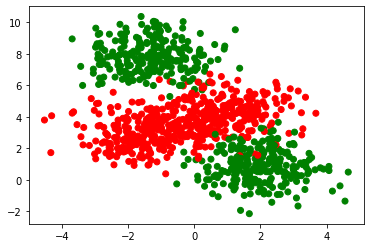

In [22]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(data,labels,stratify=labels,random_state=0)

#Scalar Feed Farward 

In [0]:
class FeedForwardW1():

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0 
    self.b2 = 0 
    self.b3 = 0 

  def sigmoid(self,x):
    return (1 / (1 + np.exp(-x)))

  def forwardPass(self,x):
    self.x1, self.x2 =x 
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1) 
    self.a2 = self.w3*self.x1 + self.w4 * self.x2 + self.b2 
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3 
    self.h3 = self.sigmoid(self.a3)
    return self.h3 

  def grad(self,x,y):
    self.forwardPass(x)
    # self.h3 - y is derivative of the sqaured error loss
    # f(x) * (1 - f(x)) is derivative of the sigmoid functions 
    self.dw1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1 
    
  def fit(self,X, Y, epochs = 1 , learning_rate = 1, display_loss = False):

    if display_loss :
      loss = {}
      w1 = {}
    for i in tqdm_notebook(range(epochs),total = epochs , unit = "epoch"):
      dw1 , dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 +=self.dw1 
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m 

      if display_loss : 
        w1[i] = self.dw1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y,Y_pred)
    
    if display_loss:
      plt.tight_layout()

      plt.subplot(2,1,1)
      plt.plot(list(w1.values()))
      plt.xlabel("Epochs")
      plt.ylabel("W1")

      plt.subplot(2,1,2)
      plt.plot(list(loss.values()))
      plt.xlabel("Epochs")
      plt.ylabel("Loss")

      plt.show()

  def predict(self, X):
    y_pred = []
    for x in X : 
      pred = self.forwardPass(x)
      y_pred.append(pred)
    return np.array(y_pred)





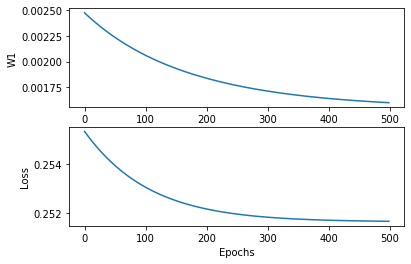

In [33]:
ffnw1 = FeedForwardW1()
ffnw1.fit(X_train,Y_train, epochs = 500 , learning_rate = 1 , display_loss = True )

In this notebook we have zoomed in the impact of changing only one weight to the loss functions. 
we clearly see the training is kind of halted as the decrese in loss function is plateaued at or around 0.252 , this is definitely not because of the y_pred is close to Y as the error is not close to Zero nor it is becasue of w5 and x1 which we have initialize to values randomly. Hence in all probability it is impact of h1 and h3 which is causing it i.e. they are either near to 0 or 1. 